In [1]:
#read the files of Cornona Virus
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gmplot
import json
import random
from urllib.request import urlopen
# visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# Retriving Dataset
df_confirmed = pd.read_csv('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/time_series_covid19_deaths_global.csv')

# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

!pip install pycountry_convert

Rename the Province/State to state and Country/Region to country

In [2]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"] - df_covid19["Recovered"] - df_covid19["Deaths"]
# df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19.head()

country          Last_Update      Lat     Long_  Confirmed  Deaths  \
0  Australia  2020-04-17 00:37:58 -25.0000  133.0000       6462      63   
1    Austria  2020-04-17 00:30:32  47.5162   14.5501      14476     410   
2     Canada  2020-04-17 00:37:42  60.0010  -95.0010      30809    1258   
3      China  2020-04-17 00:08:14  30.5928  114.3055      83406    3346   
4    Denmark  2020-04-17 00:30:32  56.0000   10.0000       7074     321   

   Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
0       2355    4044      25.381289            NaN                  NaN   
1       8986    5080     160.730147            NaN                  NaN   
2       9698   19853      81.385362            NaN                  NaN   
3      78403    1657       5.937738            NaN                  NaN   
4       3203    3550     122.129697            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        0.974930   36  AUS  
1        2.832274   40  AUT  
2        4.083222  124  CAN  
3        4.011702  156  CHN  
4        4.537744  208  DNK

In [3]:
#df_confirmed['country'] = df_confirmed["country"].replace({"US":"USA","Congo (Kinshasa)":"Democratic Republic of the Congo","Congo (Brazzaville)":"Democratic Republic of the Congo","Cote d'Ivoire":"Côte d'Ivoire","Reunion":"Réunion","Congo (Brazzaville)":"Republic of the Congo",'Bahamas, The', "country":"Bahamas", 'Gambia, The', "country", "country":"Gambia"})

In [4]:
#df_confirmed['country'].unique()

Change all the countries to their proper names

In [5]:

# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"

Inserting the continents for respected countries

In [6]:
# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


#Collecting Continent Information

df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])

In [7]:
df_covid19.head(5)

country      continent          Last_Update      Lat     Long_  \
0  Australia      Australia  2020-04-17 00:37:58 -25.0000  133.0000   
1    Austria         Europe  2020-04-17 00:30:32  47.5162   14.5501   
2     Canada  North America  2020-04-17 00:37:42  60.0010  -95.0010   
3      China           Asia  2020-04-17 00:08:14  30.5928  114.3055   
4    Denmark         Europe  2020-04-17 00:30:32  56.0000   10.0000   

   Confirmed  Deaths  Recovered  Active  Incident_Rate  People_Tested  \
0       6462      63       2355    4044      25.381289            NaN   
1      14476     410       8986    5080     160.730147            NaN   
2      30809    1258       9698   19853      81.385362            NaN   
3      83406    3346      78403    1657       5.937738            NaN   
4       7074     321       3203    3550     122.129697            NaN   

   People_Hospitalized  Mortality_Rate  UID ISO3  
0                  NaN        0.974930   36  AUS  
1                  NaN        2.832274   40  AUT  
2                  NaN        4.083222  124  CAN  
3                  NaN        4.011702  156  CHN  
4                  NaN        4.537744  208  DNK

Replace nan values with blank space

In [8]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

Make seperate Dataframes for countries and continents by dropping the longitude and latitude

In [9]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

In [10]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='Wistia',axis=1)

In [11]:
df_continents_cases.style.background_gradient(cmap='Wistia')

In [28]:
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')

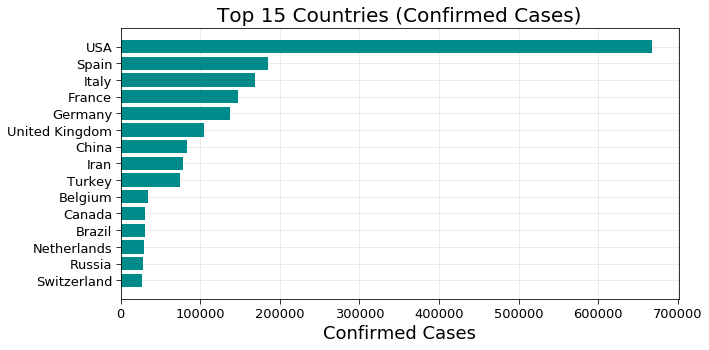

In [13]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-15:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-15:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 15 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/Top_15_Countries_(Confirmed_Cases).png')

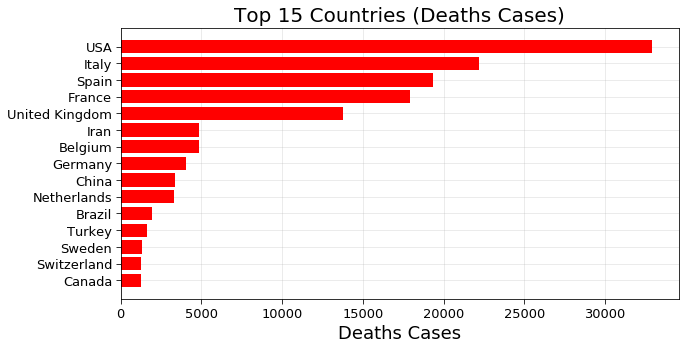

In [14]:

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-15:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-15:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 15 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/Top_10_Countries_(Deaths_Cases).png')

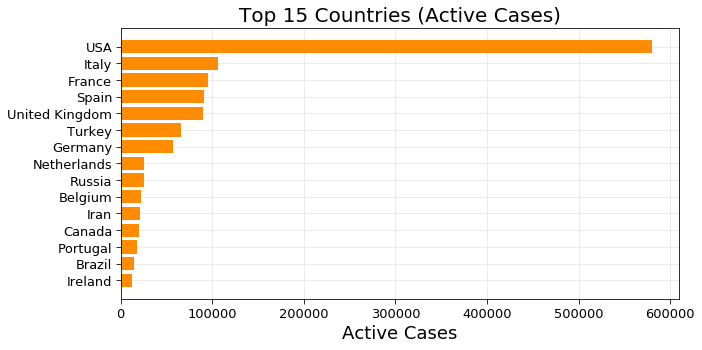

In [15]:

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-15:],df_countries_cases.sort_values('Active')["Active"].values[-15:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 15 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/Top_10_Countries_(Active_Cases).png')

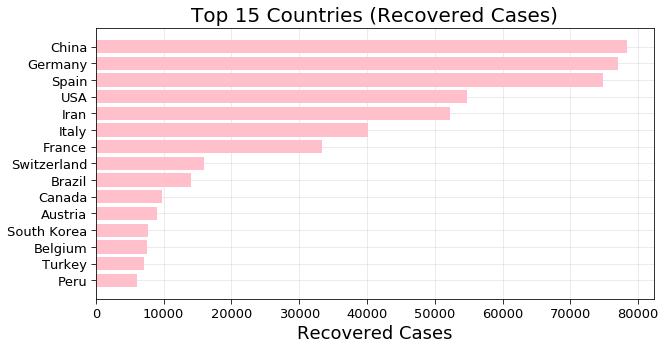

In [16]:

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-15:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-15:],color="pink")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 15 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/Top_10_Countries_(Recovered_Cases).png')

In [17]:
df_countries_cases.corr().style.background_gradient(cmap='Reds')

In [18]:
df_continents_cases.corr().style.background_gradient(cmap='Reds')

In [19]:

world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df.iloc[:,-1]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Reds")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

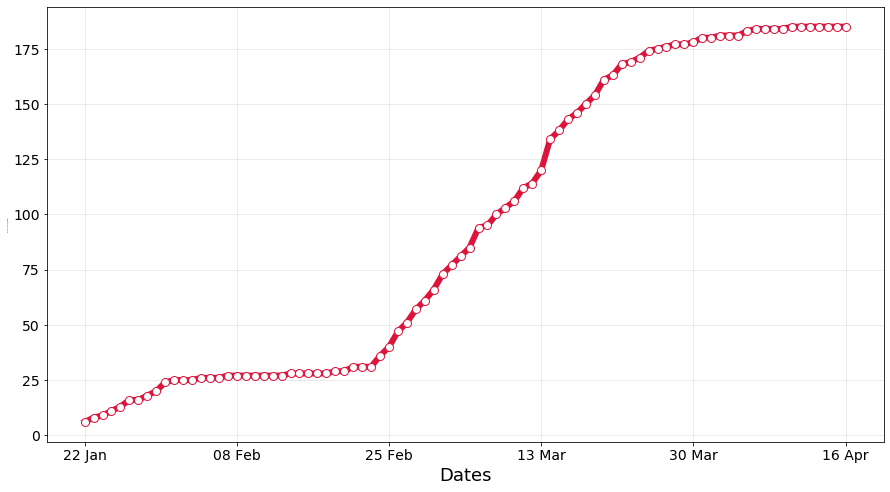

In [20]:

case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

#plt.savefig(out+'spread.png')
plt.show()
plt.close()

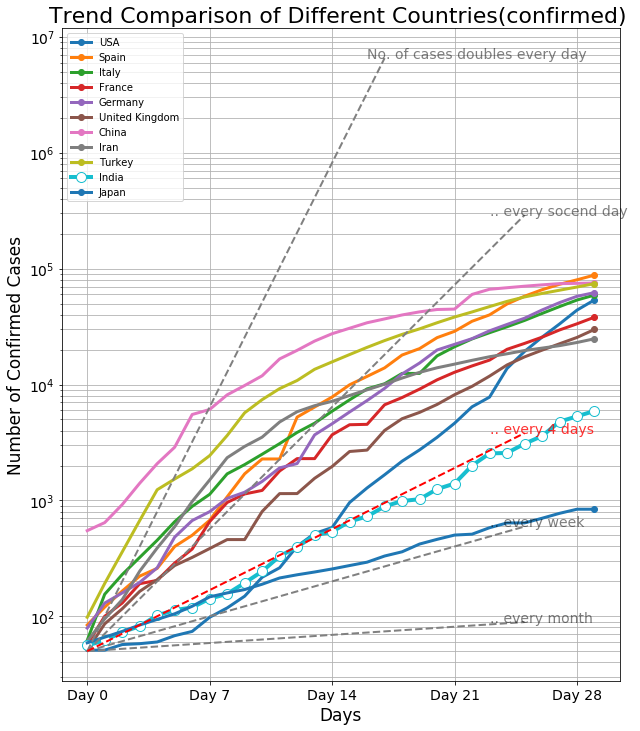

In [21]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "India" and country != "Japan" :
            continue
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries(confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/Trend_Comparison_between_Countries(confirmed).png')
plt.show()

In [22]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

In [23]:
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = "output/"

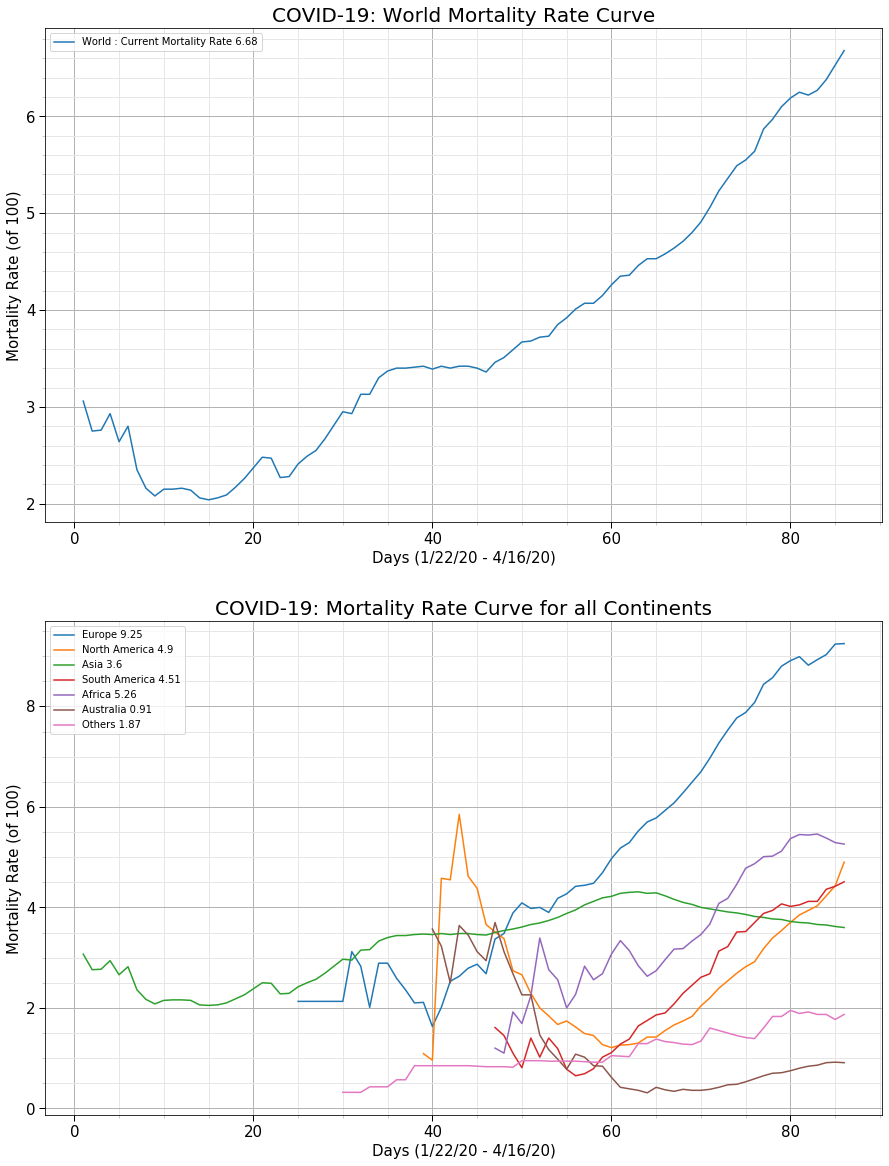

In [24]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =1
rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]))

plt_title = "COVID-19: World Mortality Rate Curve"
plot_params(ax,axis_label,plt_title)
# Legend Location
l = plt.legend(loc= "best")


#SubPlot 2
ax = f.add_subplot(212)
for i, continent in enumerate(continents[1:]):
    mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continent)
    plt.plot(np.arange(1+mortality_rate[mortality_rate == 0].shape[0],mortality_rate[mortality_rate == 0].shape[0]+mortality_rate[mortality_rate > 0].shape[0]+1),mortality_rate[mortality_rate > 0],label = continents[i+1]+" "+str(mortality_rate[-1]))

plt_title = "COVID-19: Mortality Rate Curve for all Continents"
plot_params(ax,axis_label,plt_title)

# Legend Location
l = plt.legend(loc= "best")

plt.minorticks_on()
plt.savefig('C:/Users/Hasan/Desktop/Github Repository/Projects/Corona_Anlaysis/Mortality rate.png')
plt.show()